In [1]:
import torch
import pyro
import numpy as np
import pylab as pl
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pyro
from pyro import distributions as dist
from pyro.infer.mcmc import MCMC, HMC, NUTS
import seaborn as sns

sns.set_theme()

from scripts import *
from BayesianLogisticRegression import BayesianLogisticRegression

## Data Exploration

In [2]:
# Import the dataset and remove id column
data = pd.read_csv("Datasets/cardiovascular_disease.csv", sep=";")
data.drop("id", axis=1, inplace=True)

In [3]:
# Check if data contains null values
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [4]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


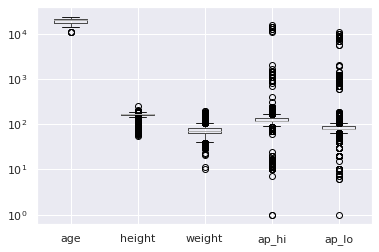

In [5]:
data[["age", "height", "weight", "ap_hi", "ap_lo"]].boxplot()
pl.yscale("log")

From both the boxplot and the summary we see that some entries have unrealistic values, for example blood pressures higher than 1000 or even negative, furthermore a person with height of 250 cm doesn't exist in the world.  
We now proceed to remove these outliers

## Data cleaning

In [6]:
ap_hi_filter = np.any([data["ap_hi"] > 250, data["ap_hi"] < 50], 0)
ap_lo_filter = np.any([data["ap_lo"] > 210, data["ap_lo"] < 30], 0)
height_filter = data["height"] > 230

data_filter = np.any([ap_lo_filter, ap_hi_filter, height_filter], 0)

print(f"Number of outliers: {data_filter.sum()}")

Number of outliers: 1220


In [7]:
data = data[~data_filter]

We decided to remove the outliers since we have a lot of data

In [8]:
# Split into train and test set

X, y = data.iloc[:, :-1], data.iloc[:, -1]

X, y = dataframe_to_tensor(X), dataframe_to_tensor(y, normalize=False)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.99)

## Define a model

In [9]:
#model = BayesianLogisticRegression().fit(x_train, y_train)

In [10]:
#model.summary()

In [11]:
#model.score(x_test, y_test)

In [12]:
from MLP import *

In [21]:
model = MLP_mcmc(num_layers=1, hidden_size=16, num_samples=100, warmup_steps=200).fit(x_train, y_train)

Sample: 100%|██████████| 300/300 [03:08,  1.59it/s, step size=8.87e-02, acc. prob=0.950]


In [23]:
model.score(x_test, y_test)

General Accuracy:  0.49758418633339696
Class 0: accuracy 0.7639430066879906, support: 34390
Class 1: accuracy 0.22579592321158354, support: 33703
